# 🛒 Retail Sales Analysis
This notebook explores the **Online Retail dataset**, performing exploratory data analysis (EDA) to uncover insights into revenue trends, customer behavior, and product performance.

### Objectives:
- Understand the dataset structure
- Clean and prepare the data
- Perform EDA (revenue trends, top customers, top products, countries)
- Generate business insights

## 1. Data Understanding
Let's load the dataset and explore its structure.

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#reading the data
df = pd.read_excel("/data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# 
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
# checking for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.isnull().mean()*100 # percentage of missing values

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
# sum of  duplicates
df.duplicated().sum()

5268

## 2. Data Cleaning
We'll clean duplicates, handle missing values, and create a new `Revenue` column.

In [10]:
# reasigning the data to new dataframe to remove dupicates
df1 = df.drop_duplicates()

In [11]:
# confimation of duplicates removed
df1.duplicated().sum()

0

In [12]:
# checking the data types
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:

# grouping into countries  countries
df1.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

Country
United Kingdom          23494
Germany                   603
France                    461
EIRE                      360
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Greece                      6
Canada                      6
Czech Republic              5
European Community          5
Lithuania                   4
Bahrain                     4
Un

In [45]:

df1['Country'].value_counts()

Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


## 3. Exploratory Data Analysis (EDA)



In [15]:
#  Check for ...
# Number of unique customers.

# Number of unique products.

# Total transactions.

df1.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

####  This dataset represents a medium-sized online retailer with tens of thousands of transactions, thousands of products, and a diverse international customer base. The wide spread of quantities and prices, along with returns and missing customer IDs, makes it a realistic dataset for uncovering sales trends, customer behavior, and business opportunities.

## 3.1 Sales Overview

In [16]:
# checking for total revenue
total_revenue = round(df1['Quantity'] * df1['UnitPrice']).sum()
total_revenue

9721196.0

#### The company generated almost £10M in sales during the year, but how was this revenue distributed across time, products, and customers?

### 3.2 Revenue Trends by Month

In [17]:
# Revenue by month (time trend of revenue)
#Creating a new column for revenue
df1['Revenue'] =  (df1['Quantity'] * df1['UnitPrice']).round(2)
#extracting month from invoice date
df1['Month'] = df1['InvoiceDate'].dt.to_period('M')
# Grouping by month and summing revenue
monthly_revenue = df1.groupby("Month")["Revenue"].sum().reset_index()
print(monthly_revenue)


      Month     Revenue
0   2010-12   746723.61
1   2011-01   558448.56
2   2011-02   497026.41
3   2011-03   682013.98
4   2011-04   492367.84
5   2011-05   722094.10
6   2011-06   689977.23
7   2011-07   680156.99
8   2011-08   681386.46
9   2011-09  1017596.68
10  2011-10  1069368.23
11  2011-11  1456145.80
12  2011-12   432701.06


C:\Users\USER\AppData\Local\Temp\ipykernel_22204\1313448485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Revenue'] =  (df1['Quantity'] * df1['UnitPrice']).round(2)
C:\Users\USER\AppData\Local\Temp\ipykernel_22204\1313448485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df1['InvoiceDate'].dt.to_period('M')


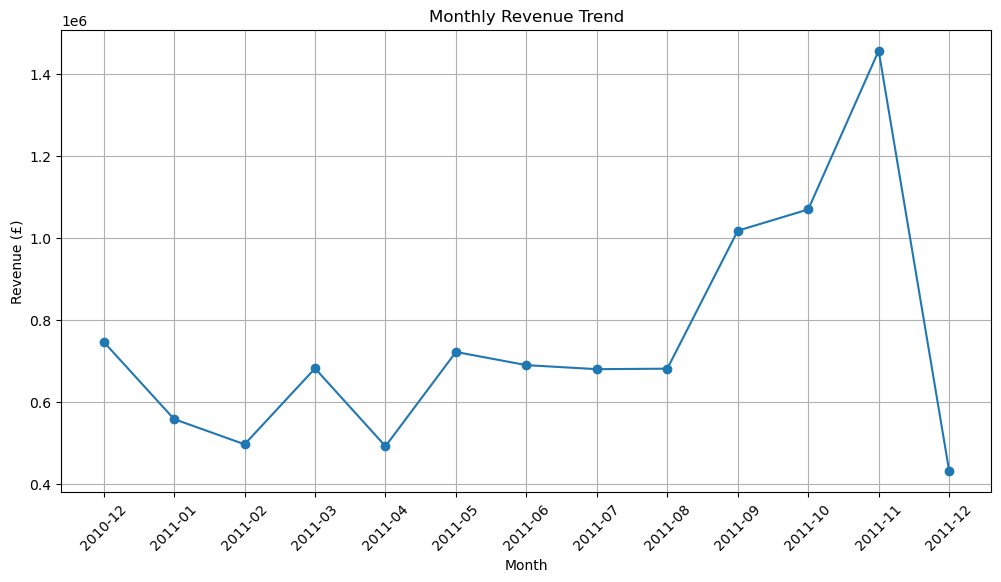

In [18]:
#visualizeing the monthly revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue["Month"].astype(str), monthly_revenue["Revenue"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.show()


 📌 **Observation:** Revenue spikes around August, peaks strongly in November (likely holiday season), and dips in December.

### 3.3 Revenue by country (which countries contribute most revenue)

In [19]:
#Revenue by country (which countries contribute most revenue).
# Grouping by country and summing revenue
country_revenue = df1.groupby("Country")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False).head(10)
print(country_revenue)

           Country     Revenue
36  United Kingdom  8167128.18
24     Netherlands   284661.54
10            EIRE   262993.38
14         Germany   221509.47
13          France   197317.11
0        Australia   137009.77
33     Switzerland    56363.05
31           Spain    54756.03
3          Belgium    40910.96
32          Sweden    36585.41


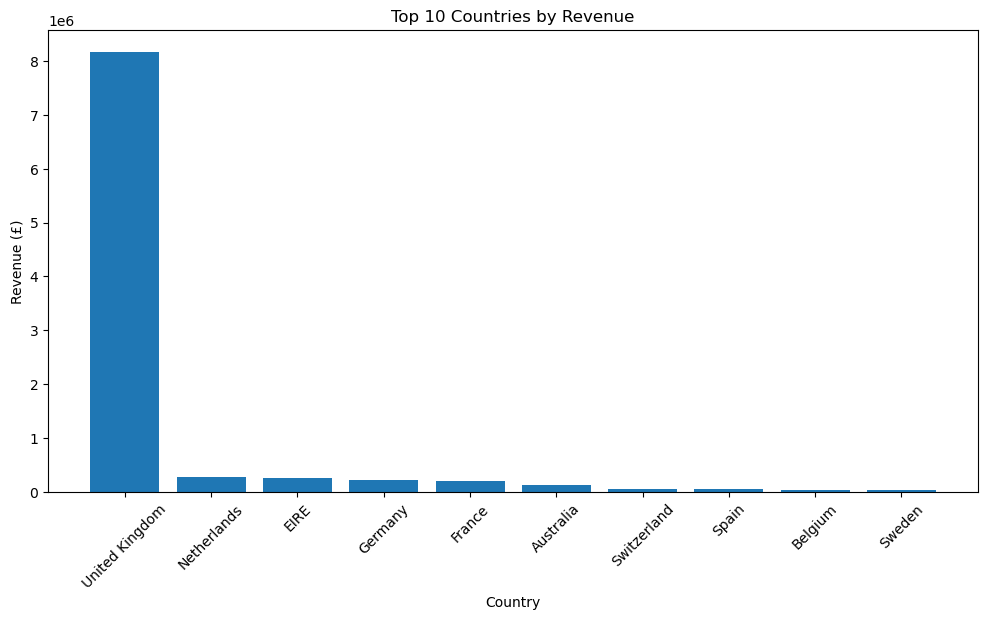

In [61]:
#visualizeing the top countries with revenue

plt.figure(figsize=(12,6))
plt.bar(country_revenue["Country"], country_revenue["Revenue"])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue (£)")
plt.show()


 📌 **Observation:** The UK dominates revenue, with significant contributions from a few other European countries.

### 3.4 Customer Analysis

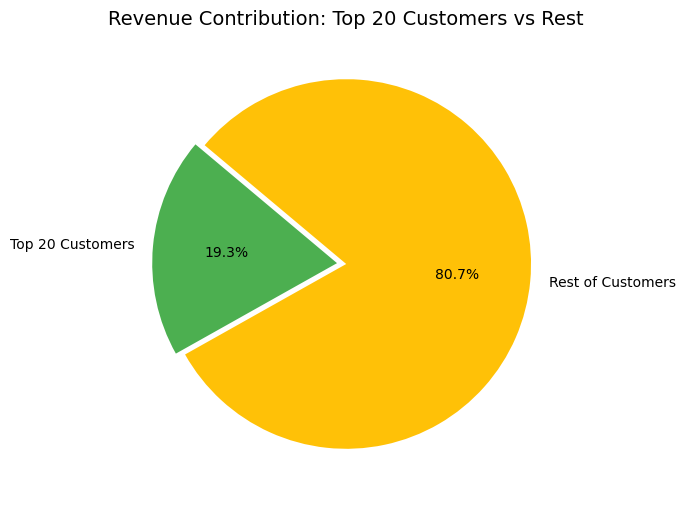

In [92]:
#Top 20 customers by total revenue.
top_customers = df1.groupby("CustomerID")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False).head(20)
top20_revenue = round(top_customers['Revenue'].sum())
total_revenue = round(df1['Revenue'].sum())
# Pie chart visualization
labels = ['Top 20 Customers', 'Rest of Customers']
values = [top20_revenue, total_revenue - top20_revenue]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#4CAF50', '#FFC107'], explode=(0.05, 0))  # explode highlights Top 20

plt.title("Revenue Contribution: Top 20 Customers vs Rest", fontsize=14)
plt.show()

 📌 **Observation:** The top 20 customers contribute only about ~19% of total revenue, showing the business isn’t overly dependent on a few customers.

### 3.5 Product Analysis

In [82]:
# Top 10 products by total revenue.
top_products = df1.groupby("Description")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False).head(20)
print(top_products)

                             Description    Revenue
1098                      DOTCOM POSTAGE  206245.48
2915            REGENCY CAKESTAND 3 TIER  164459.49
3918  WHITE HANGING HEART T-LIGHT HOLDER   99612.42
2471                       PARTY BUNTING   98243.88
1866             JUMBO BAG RED RETROSPOT   92175.79
2803                  RABBIT NIGHT LIGHT   66661.63
2753                             POSTAGE   66230.64
2439     PAPER CHAIN KIT 50'S CHRISTMAS    63715.24
244        ASSORTED COLOUR BIRD ORNAMENT   58792.42
773                        CHILLI LIGHTS   53746.66
3524                      SPOTTY BUNTING   42030.67
1864             JUMBO BAG PINK POLKADOT   41584.43
414             BLACK RECORD COVER FRAME   40578.21
2521      PICNIC BASKET WICKER 60 PIECES   39619.50
3195   SET OF 3 CAKE TINS PANTRY DESIGN    37378.79
1078       DOORMAT KEEP CALM AND COME IN   36532.39
1833            JAM MAKING SET WITH JARS   36069.34
3968   WOOD BLACK BOARD ANT WHITE FINISH   35795.97
2054        

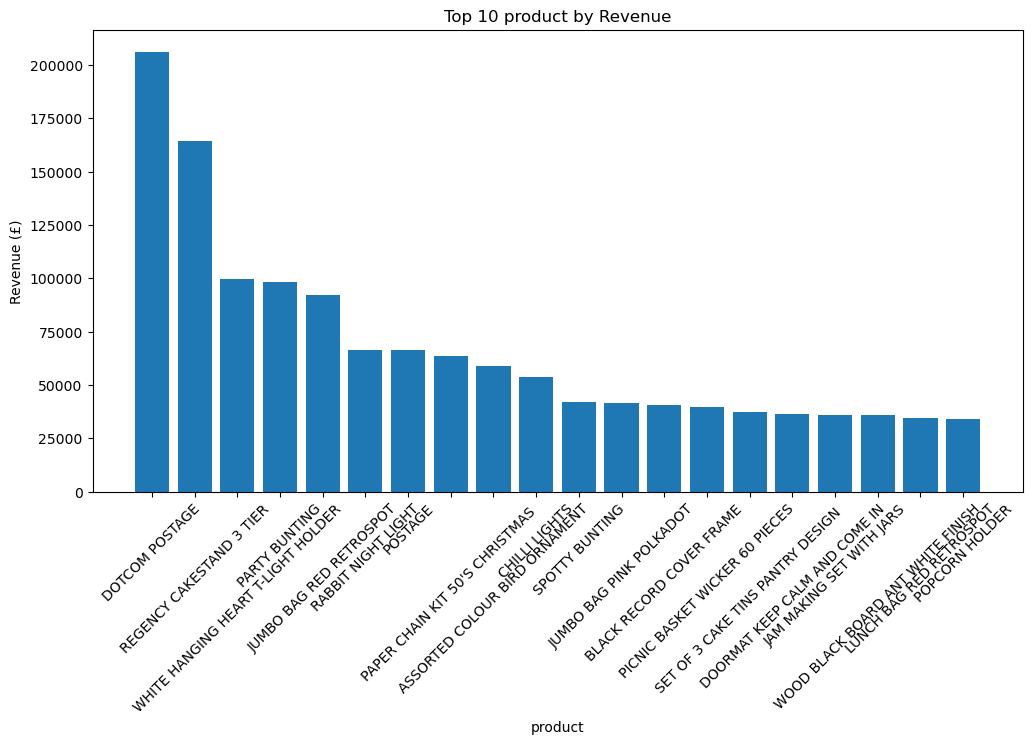

In [83]:
plt.figure(figsize=(12,6))
plt.bar(top_products["Description"], top_products["Revenue"])
plt.xticks(rotation=45)
plt.title("Top 10 product by Revenue")
plt.xlabel("product")
plt.ylabel("Revenue (£)")
plt.show()

 📌 **Observation:** A few products like *Dotcom Postage* and *Regency Cake Stand* drive a large share of sales revenue.

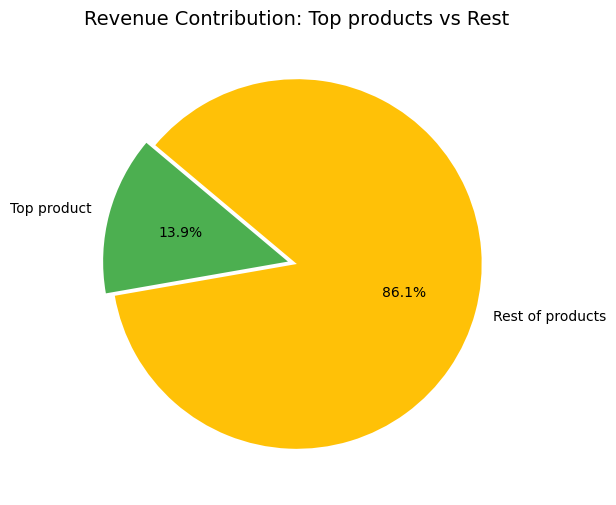

the top products contributed 13.9 % of the total revenue


In [93]:
 
top_products_revenue = round(top_products['Revenue'].sum())
total_product_revenue = round(df1['Revenue'].sum())
top_product_revenue_contributed = (top_products_revenue / total_product_revenue) * 100
# Pie chart visualization
labels = ['Top product', 'Rest of products']
values = [top_products_revenue, total_product_revenue - top_products_revenue]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#4CAF50', '#FFC107'], explode=(0.05, 0))  # explode highlights Top 20

plt.title("Revenue Contribution: Top products vs Rest", fontsize=14)
plt.show()
print(f'the top products contributed {round(top_product_revenue_contributed,1)} % of the total revenue')


In [96]:
# Top 10 products by total quatity sold.
top_quantity_products = df1.groupby("Description")["Quantity"].sum().reset_index().sort_values(by="Quantity", ascending=False).head(10)
print(top_quantity_products)

                             Description  Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
1866             JUMBO BAG RED RETROSPOT     47260
2740                      POPCORN HOLDER     36322
244        ASSORTED COLOUR BIRD ORNAMENT     36282
2395     PACK OF 72 RETROSPOT CAKE CASES     36016
3918  WHITE HANGING HEART T-LIGHT HOLDER     35298
2803                  RABBIT NIGHT LIGHT     30631
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26299
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24719


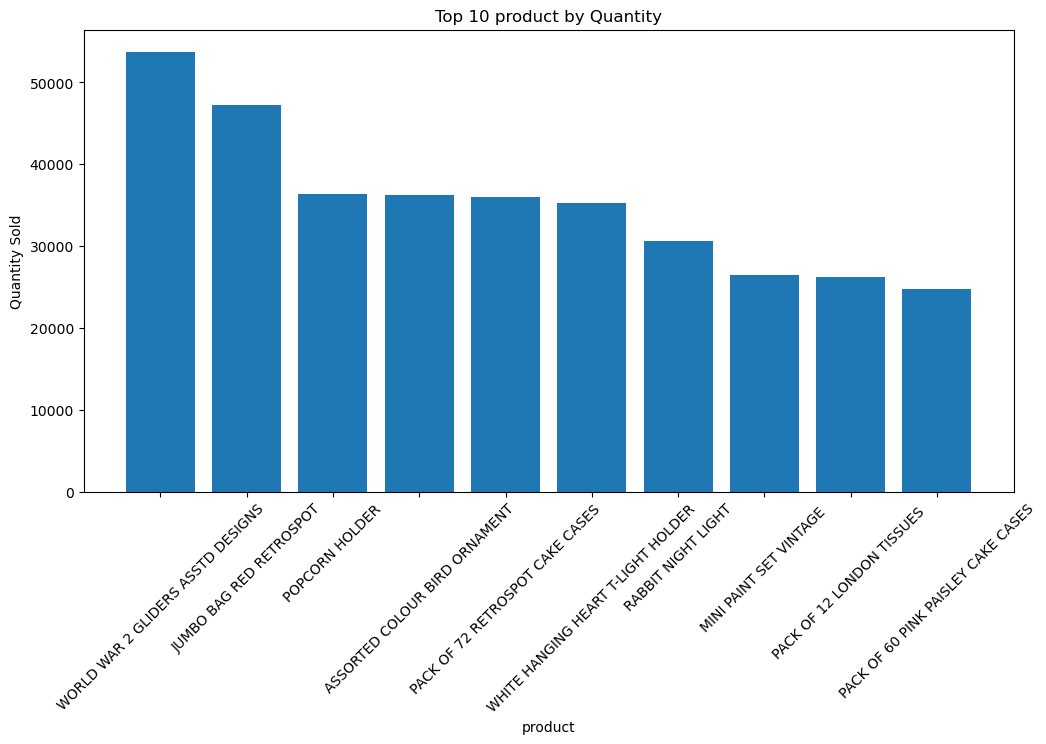

In [97]:
plt.figure(figsize=(12,6))
plt.bar(top_quantity_products["Description"], top_quantity_products["Quantity"])
plt.xticks(rotation=45)
plt.title("Top 10 product by Quantity")
plt.xlabel("product")
plt.ylabel("Quantity Sold")
plt.show()

 📌 **Observation:** High-volume products (like World War 2 Gliders, Jumbo Bags, Cake Cases) don’t always match the top revenue drivers, highlighting different sales dynamics.

### 3.6 Forcasting next six month revenue

c:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


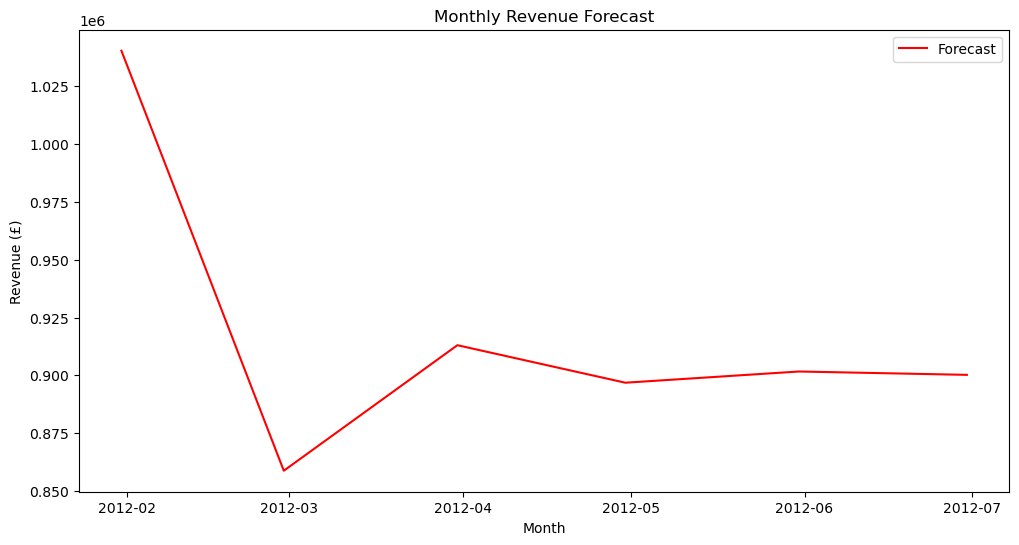

In [27]:
# Monthly Revenue Forecast
monthly_revenue = df1.set_index('InvoiceDate').resample('ME')['Revenue'].sum()

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(monthly_revenue, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

plt.figure(figsize=(12,6))
# plt.plot(monthly_revenue, label='Historical Revenue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("Monthly Revenue Forecast")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.legend()
plt.show()


 📌 **Observation:** Revenue experiences a decline at the beginning of the year, followed by a period of stabilization in the mid-year months.

## 4. Key Insights & Conclusion
- Revenue peaks in **November** (holiday effect), but dips in December.
- **UK is the primary market**, followed by a few European countries.
- **Top 20 customers contribute ~19%**, showing a broad customer base.
- A handful of products dominate revenue, while others sell high volumes at lower prices.